> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The data which I am primarily working on is tmdb movies dataset which contains the movie database and it consists of data for over 5000+ movies and basic information of the movies like movie id, ratings, popularity, actors, directors etc. and the whole dataset is prepared for the period of 1960-2015.
We are going to do the analysis of the data by using the libraries such as numpy, pandas, matplotlib.
Since this is a huge dataset and a number of evaluations can be made from the given data out of which a few are as follows:

1)How many movies have the revenue less than the average revenue generated?
2)What percentage of movies generate revenue greater than the average revenue?
3)Find the number of movies released each decade?
4)What is the average runtime of the movies?
5)Does movies having higher budget produce more profit?
6)Find the total profit generated against each genre?
7)Find the correlation between the total budget, profit and revenue generated for each genre?
8)List the top 10 directors who generated the most profit?


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import csv
from datetime import datetime
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Loading Dataset
tmdb_movie_data = pd.read_csv('tmdb-movies.csv')
tmdb_movie_data.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# Cleaning And Pruning dataset
delete_col = ["id", "imdb_id", "popularity", "homepage","keywords", "budget_adj", "revenue_adj", "overview", "production_companies", "vote_count","vote_average"]
new_data = tmdb_movie_data.drop(delete_col,1)
new_data.head(1)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


In [5]:
new_data.shape

(10866, 10)

In [6]:
tmdb_new = new_data.drop_duplicates()
tmdb_new.shape


(10865, 10)

In [7]:
# Removing all the zeroes in the budget and revenue column to NaN
emp_df = pd.DataFrame()
new_df = emp_df.append(tmdb_new)
temp_list = ["revenue", "budget"]
new_df[temp_list] = new_df[temp_list].replace(0, np.NaN)
new_df.dropna(subset = temp_list, inplace = True)
new_df.shape


(3854, 10)

In [8]:
tmdb_new.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
tagline           object
runtime            int64
genres            object
release_date      object
release_year       int64
dtype: object

In [9]:
# Changing datatype for the revenue and budget column
change_list = ["revenue", "budget"]
new_df[change_list] = new_df[change_list].applymap(np.int64)
new_df.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
tagline           object
runtime            int64
genres            object
release_date      object
release_year       int64
dtype: object

In [10]:
new_df["runtime"] = new_df["runtime"].replace(0,np.NaN)

In [11]:
new_df.insert(2,"profit", new_df["revenue"] - new_df["budget"])
new_df.head(1)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


In [ ]:
### RESEARCH QUESTION 1: Finding the number of movies with revenue less than the average revenue

In [12]:
#Number of movies with revenue less than avg and more than average
avg_rev = new_df["revenue"].mean()
avg_rev

107686616.09807992

In [13]:
r = new_df[new_df["revenue"]>avg_rev].shape[0]
r

1107

In [14]:
s = new_df[new_df["revenue"]<=avg_rev].shape[0]
s


2747

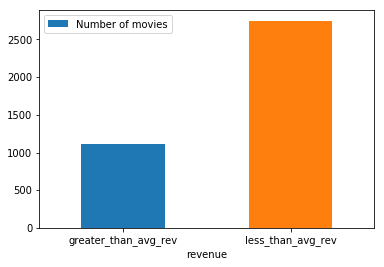

In [15]:
dplot = pd.DataFrame({'revenue':["greater_than_avg_rev", "less_than_avg_rev"], 'Number of movies':[r,s]})
ax = dplot.plot.bar(x='revenue', y='Number of movies', rot=0)

In [ ]:
*** Analysis: From the above visualization we see that more than 50% of the movies have revenue less than the average revenue.

In [ ]:
### RESEARCH QUESTION 2: Finding the percentage of movies with revenue greater than average revenue

In [16]:
# Percentage of movies having revenue greater than average revenue
mov_tot = r+s
mov_tot

3854

In [17]:
per_greater_than_avg = (r*100/mov_tot)
per_greater_than_avg

28.72340425531915

In [18]:
per_less_than_avg = (s*100/mov_tot)
per_less_than_avg 

71.27659574468085

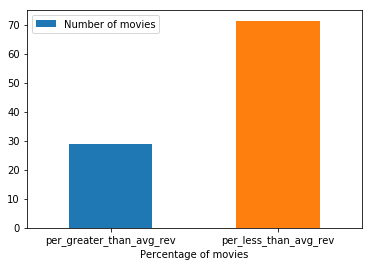

In [19]:
dpplot = pd.DataFrame({'Percentage of movies':["per_greater_than_avg_rev", "per_less_than_avg_rev"], 'Number of movies':[per_greater_than_avg, per_less_than_avg ]})
axx = dpplot.plot.bar(x='Percentage of movies', y='Number of movies', rot=0)

In [ ]:
*** Analysis: The previous graph represented the number of movies but this graph enables us to find the percentage of movies having 
    revenue greater than the average revenue which is just 28.7%

In [ ]:
### RESEARCH QUESTION 3: Finding the number of movies released each decade 

In [20]:
decade_dict = {"decade":[], "count":[]}

In [21]:
df1 = new_df[new_df["release_year"] >1960]
df1 = df1[df1["release_year"] <= 1970]
fir_dec = df1.shape[0]
decade_dict["decade"].append("1960-1970")
decade_dict["count"].append(fir_dec)
fir_dec

77

In [22]:
df2 = new_df[new_df["release_year"] >1970]
df2 = df2[df2["release_year"] <= 1980]
sec_dec = df2.shape[0]
decade_dict["decade"].append("1970-1980")
decade_dict["count"].append(sec_dec)
sec_dec

145

In [23]:
df3 = new_df[new_df["release_year"] >1980]
df3 = df3[df3["release_year"] <= 1990]
third_dec = df3.shape[0]
decade_dict["decade"].append("1980-1990")
decade_dict["count"].append(third_dec)
third_dec

425

In [24]:
df4 = new_df[new_df["release_year"] >1990]
df4 = df4[df4["release_year"] <= 2000]
fourth_dec = df4.shape[0]
decade_dict["decade"].append("1990-2000")
decade_dict["count"].append(fourth_dec)
fourth_dec

808

In [25]:
df5 = new_df[new_df["release_year"] >2000]
df5 = df5[df5["release_year"] <= 2010]
fifth_dec = df5.shape[0]
decade_dict["decade"].append("2000-2010")
decade_dict["count"].append(fifth_dec)
fifth_dec

1532

In [26]:
df6 = new_df[new_df["release_year"] >2010]
df6 = df6[df6["release_year"] <= 2020]
sixth_dec = df6.shape[0]
decade_dict["decade"].append("2010-2010")
decade_dict["count"].append(sixth_dec)
sixth_dec

862

In [27]:
decade_dict

{'decade': ['1960-1970',
  '1970-1980',
  '1980-1990',
  '1990-2000',
  '2000-2010',
  '2010-2010'],
 'count': [77, 145, 425, 808, 1532, 862]}

In [28]:
dfobj = pd.DataFrame.from_dict(decade_dict)
dfobj

,decade,count
0,1960-1970,77
1,1970-1980,145
2,1980-1990,425
3,1990-2000,808
4,2000-2010,1532
5,2010-2010,862


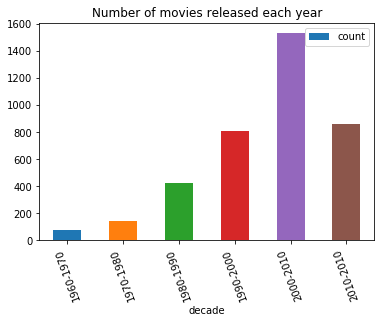

In [27]:
dfobj.plot.bar(x = "decade", y = "count", rot = 110, title = "Number of movies released each year")
plt.show(block = True)

In [ ]:
*** Analysis: The given graph represents that rate of release of new movies has been continuosly increasing and reaches the maximum
    for 2000-10, probably would be increasing in the next decade also but we don't have data for the complete decade.

In [ ]:
### RESEARCH QUESTION 4: Finding the average runtime of movies

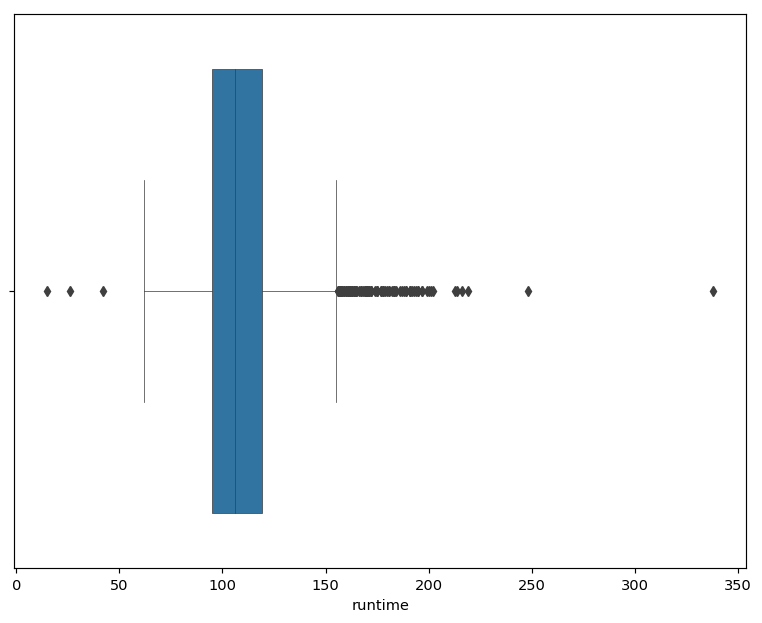

In [29]:
plt.figure(figsize=(9,7), dpi = 105)
sns.boxplot(new_df['runtime'], linewidth = 0.5)
plt.show()

In [52]:
new_df["runtime"].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [ ]:
*** Analysis: The above data represents that nearly 25% movies has runtime of less than 95 mins and 50% has less than 106 mins.

In [ ]:
### RESEARCH QUESTION 5: Finding correlation between budget and profit for the movies

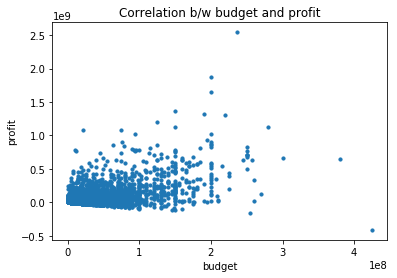

In [35]:
new_df.plot.scatter(x = "budget", y = "profit", s = 10, title = "Correlation b/w budget and profit")
plt.show()

In [ ]:
*** Analysis: The above scatter plot depicts that the if the movies have higher budget does not necessarily produce higher profit.

In [ ]:
### RESEARCH QUESTION 6: Finding total revenue generated for each genre

In [37]:
# Creating splitted dataset for composite columns
def splitDataFrameList(in_df,column_name,separator):
    row_accumulator = []
    
    def splitListToRows(in_row, separator):
        try:
            split_row = in_row[column_name].split(separator)
        
            for s in split_row:
                new_row = in_row.to_dict()
                new_row[column_name] = s
                row_accumulator.append(new_row)
        except AttributeError:
            print("Split failed for ", type(in_row[column_name]))
    
    in_df.apply(splitListToRows, axis=1, args = (separator, ))
    revised_df = pd.DataFrame(row_accumulator)
    return revised_df

In [38]:
# Creating genre split
genres_expanded_df = splitDataFrameList(new_df, "genres","|")
genres_expanded_df.head()

,budget,cast,director,genres,original_title,profit,release_date,release_year,revenue,runtime,tagline
0,150000000,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,Jurassic World,1363528810,6/9/15,2015,1513528810,124,The park is open.
1,150000000,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Adventure,Jurassic World,1363528810,6/9/15,2015,1513528810,124,The park is open.
2,150000000,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Science Fiction,Jurassic World,1363528810,6/9/15,2015,1513528810,124,The park is open.
3,150000000,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Thriller,Jurassic World,1363528810,6/9/15,2015,1513528810,124,The park is open.
4,150000000,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action,Mad Max: Fury Road,228436354,5/13/15,2015,378436354,120,What a Lovely Day.


In [39]:
# Getting genre avg. revenue
genres_revenue = genres_expanded_df.groupby("genres")["revenue"].mean()
genres_revenue_df = pd.DataFrame(genres_revenue.reset_index())


In [40]:
# Getting genre avg. budget
genres_budget = genres_expanded_df.groupby("genres")["budget"].mean()
genres_budget_df = pd.DataFrame(genres_budget.reset_index())



In [41]:
# Getting genre avg. profit
genres_profit = genres_expanded_df.groupby("genres")["profit"].mean()
genres_profit_df = pd.DataFrame(genres_profit.reset_index())


In [42]:
# Combining all the results into a single dataframe
stacked_genres_df = pd.concat([genres_revenue_df, genres_budget_df, genres_profit_df], axis = 1, join  = "inner")
stacked_genres_df = stacked_genres_df.loc[:,~stacked_genres_df.columns.duplicated()]
stacked_genres_df


,genres,revenue,budget,profit
0,Action,1.565772e+08,5.644044e+07,1.001367e+08
1,Adventure,2.182919e+08,6.993891e+07,1.483529e+08
2,Animation,2.571215e+08,7.693647e+07,1.801850e+08
3,Comedy,9.733657e+07,3.310906e+07,6.422751e+07
4,Crime,8.414309e+07,3.303574e+07,5.110735e+07
5,Documentary,2.252440e+07,4.852976e+06,1.767142e+07
6,Drama,7.432727e+07,2.805238e+07,4.627488e+07
7,Family,2.031535e+08,6.247916e+07,1.406744e+08
8,Fantasy,2.182341e+08,7.071740e+07,1.475167e+08
9,Foreign,1.111596e+07,9.430669e+06,1.685289e+06


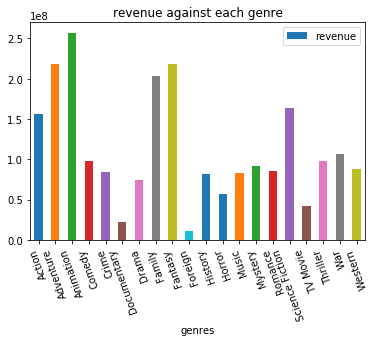

In [43]:
# Plotting avg.revenue by genre
genres_revenue_df.plot.bar(x = "genres", y = "revenue", rot = 110, title = "revenue against each genre")
plt.show(block = True)

In [ ]:
*** Analysis: The genre generating highest revenue are those of adventure, family, fantasy and animation genre and the ones
    having least profit are of documentary and foreign genre.

In [44]:
### RESEARCH QUESTION 7: Correlation Between profit, budget and revenue generated for each genre

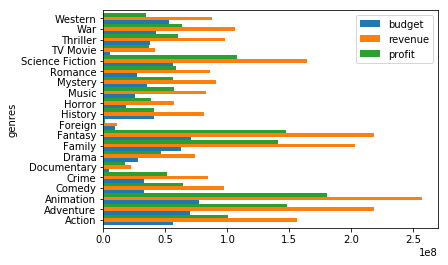

In [45]:
# Plotting avg. budget, revenue, profit by genre
stacked_genres_df.plot(x = "genres", y = ["budget", "revenue", "profit"], kind = "barh", width = 1)


In [ ]:
*** Analysis: The above graph shows a correlation between the budget, revenue and profit of various genres.

In [ ]:
### RESEARCH QUESTION 8: Top 10 directors generating most profit

In [46]:
# Creating Director's split
directors_expanded_df = splitDataFrameList(new_df, "director","|")
directors_expanded_df.head()

Split failed for  <class 'float'>


,budget,cast,director,genres,original_title,profit,release_date,release_year,revenue,runtime,tagline
0,150000000,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Jurassic World,1363528810,6/9/15,2015,1513528810,124,The park is open.
1,150000000,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,228436354,5/13/15,2015,378436354,120,What a Lovely Day.
2,110000000,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Insurgent,185238201,3/18/15,2015,295238201,119,One Choice Can Destroy You
3,200000000,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,1868178225,12/15/15,2015,2068178225,136,Every generation has a story.
4,190000000,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Furious 7,1316249360,4/1/15,2015,1506249360,137,Vengeance Hits Home


In [47]:
directors_expanded_df.director.unique()

array(['Colin Trevorrow', 'George Miller', 'Robert Schwentke', ...,
       'Peter R. Hunt', 'Martin Rosen', 'Howard Hawks'], dtype=object)

In [48]:
dir_group = directors_expanded_df.groupby("director")["profit"].sum()
dir_group

director
 FrÃ©dÃ©ric Jardin             -2496642
A.R. Murugadoss                66900000
Aaron Blaise                  -99999750
Aaron Norris                    -906293
Aaron Seltzer                 199717971
Abbas Tyrewala                  8800000
Abe Sylvia                     -3944875
Abel Ferrara                   -9997187
Adam Green                     -2447396
Adam Marcus                    -2999985
Adam McKay                    517576455
Adam Rifkin                   -47773556
Adam Shankman                 486562773
Adam Wingard                   -2632839
Adrian Lyne                   622579861
Adrienne Shelly                20179430
Agnieszka Wojtowicz-Vosloo      -893605
AgustÃ­n DÃ­az Yanes            -678046
Akiva Goldsman                -29199769
Akiva Schaffer                   267862
Alan J. Pakula                281211603
Alan Mak                        5547000
Alan Myerson                   23479000
Alan Parker                   127492397
Alan Poul                      

In [49]:
dir_group_df = pd.DataFrame(dir_group.reset_index())
dir_group_df.head()

,director,profit
0,FrÃ©dÃ©ric Jardin,-2496642
1,A.R. Murugadoss,66900000
2,Aaron Blaise,-99999750
3,Aaron Norris,-906293
4,Aaron Seltzer,199717971


In [50]:
# Finding top 10 direcctors with maximum profit
sorted_df = dir_group_df.sort_values(by=["profit"], ascending=False)
sorted_df = sorted_df[:11].reset_index()

sorted_df_final = pd.DataFrame()
sorted_df_final["director"] = sorted_df["director"]
sorted_df_final["profit"] = sorted_df["profit"] 

sorted_df_final

,director,profit
0,Steven Spielberg,7486514691
1,Peter Jackson,5197244659
2,James Cameron,5081994863
3,Michael Bay,3557208171
4,David Yates,3379295625
5,Christopher Nolan,3162548502
6,Chris Columbus,3116631503
7,George Lucas,2955996893
8,Robert Zemeckis,2846690869
9,J.J. Abrams,2839169916


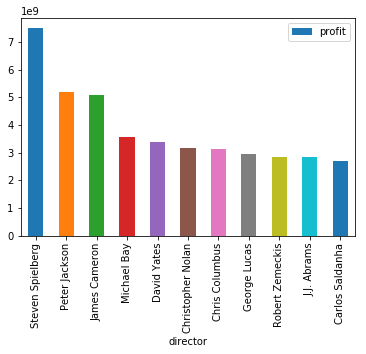

In [51]:
sorted_df_final.plot(x = "director", y = "profit", kind = "bar")

In [ ]:
*** Analysis: The above graph depicts the top performing directors, that is the directors producing the highest amount of profit.

In [53]:
new_df["profit"].describe()

count    3.854000e+03
mean     7.048292e+07
std      1.506195e+08
min     -4.139124e+08
25%     -1.321535e+06
50%      2.002019e+07
75%      8.170331e+07
max      2.544506e+09
Name: profit, dtype: float64

In [54]:
new_df["budget"].describe()

count    3.854000e+03
mean     3.720370e+07
std      4.220822e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

<a id='conclusions'></a>
## Conclusions

> 1)From the given analysis we conclude that since most of the movies have revenue less than the average revenue, this proves that possibly there are very few movies which gain much profit and most remain the average movie.
> 2)We also come to the conclusion that the movies having more budget will produce higher profits.
> 3)The maximum profit gained by any movie was 2.544506e+09 dollars
> 4)The maximum budget for any movie was 4.250000e+08 dollars
> 5)The maximum of runtime of a movie in the dataset was 338 mins and minimum was 15 mins.

<a id='Limitations'></a>
## Limitations

> The unit of budget and revenue was not given in the data so there is no surity if the findings are correct as I have taken all the numbers in dollars and there were a number of rows having zero due to which there may skewness in the data


> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0